In [1]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


expedia = pd.read_csv('C:\\expedia.csv')
df = expedia.loc[expedia['prop_id'] == 104517]
df = df.loc[df['srch_room_count'] == 1]
df = df.loc[df['visitor_location_country_id'] == 219]
df = df[['date_time', 'price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]


df.info()

df['price_usd'].describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3049 entries, 2041 to 9917395
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date_time                 3049 non-null   object 
 1   price_usd                 3049 non-null   float64
 2   srch_booking_window       3049 non-null   int64  
 3   srch_saturday_night_bool  3049 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 119.1+ KB


count    3049.000000
mean      112.939023
std       113.374049
min         0.120000
25%        67.000000
50%       100.000000
75%       141.000000
max      5584.000000
Name: price_usd, dtype: float64

In [2]:

df.head(5)


,date_time,price_usd,srch_booking_window,srch_saturday_night_bool
2041,2013-03-14 11:27:28,206.0,99,1
3152,2013-01-03 20:48:24,186.0,6,0
5166,2013-01-19 16:51:27,61.0,1,0
10135,2013-01-26 11:34:23,72.0,116,0
10560,2013-04-29 09:39:50,246.0,245,0


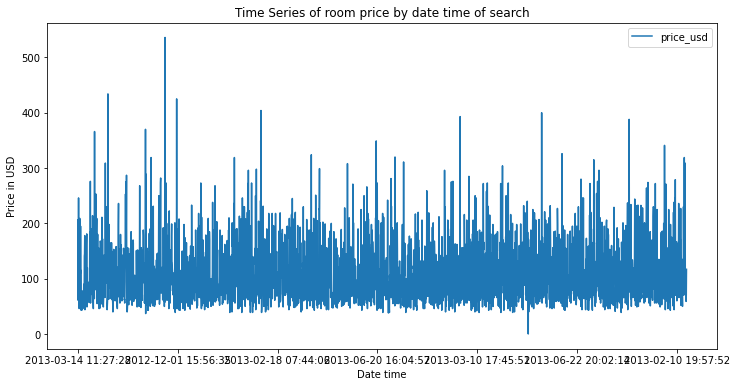

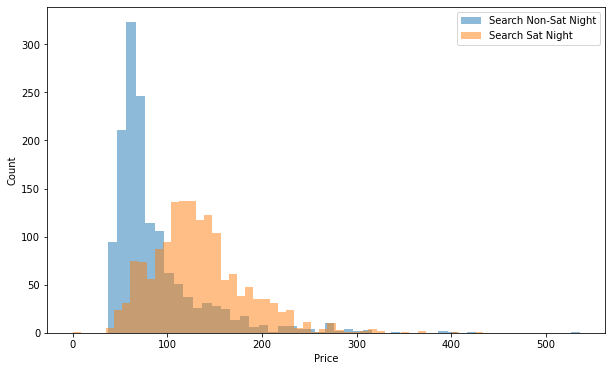

In [4]:

expedia.loc[(expedia['price_usd'] == 5584) & (expedia['visitor_location_country_id'] == 219)]
df = df.loc[df['price_usd'] < 5584]

df.plot(x='date_time', y='price_usd', figsize=(12,6))
plt.xlabel('Date time')
plt.ylabel('Price in USD')
plt.title('Time Series of room price by date time of search')


a = df.loc[df['srch_saturday_night_bool'] == 0, 'price_usd']
b = df.loc[df['srch_saturday_night_bool'] == 1, 'price_usd']
plt.figure(figsize=(10, 6))
plt.hist(a, bins = 50, alpha=0.5, label='Search Non-Sat Night')
plt.hist(b, bins = 50, alpha=0.5, label='Search Sat Night')
plt.legend(loc='upper right')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


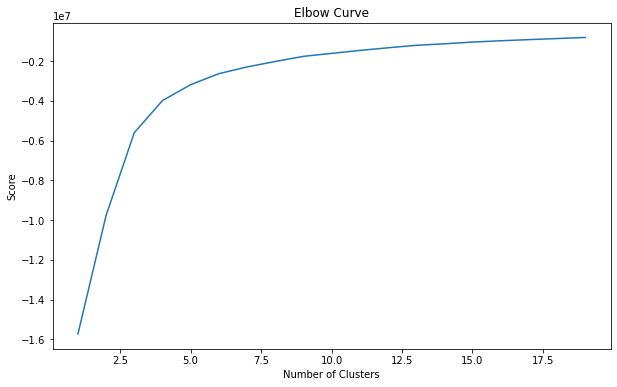

In [5]:

# Clustering-Based Anomaly Detection
# k-means algorithm
# k-means is a widely used clustering algorithm. It creates ‘k’ similar clusters of data points. Data instances that fall outside of these groups could potentially be marked as anomalies. Before we start k-means clustering, we use elbow method to determine the optimal number of clusters.
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();


Text(0.5, 0.92, 'K Means')

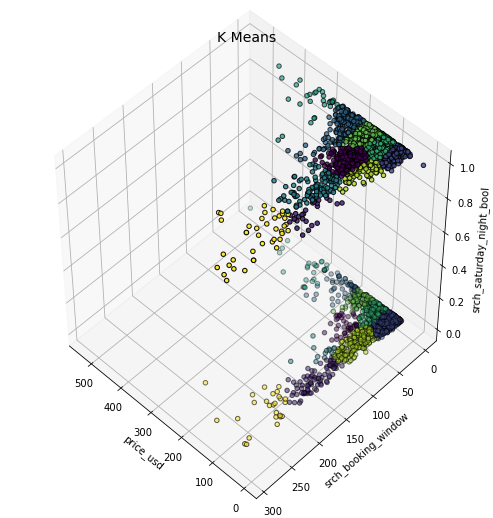

In [8]:

X = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X = X.reset_index(drop=True)

km = KMeans(n_clusters=10)
km.fit(X)
km.predict(X)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],
          c=labels.astype(np.float), edgecolor="k")
ax.set_xlabel("price_usd")
ax.set_ylabel("srch_booking_window")
ax.set_zlabel("srch_saturday_night_bool")
plt.title("K Means", fontsize=14)



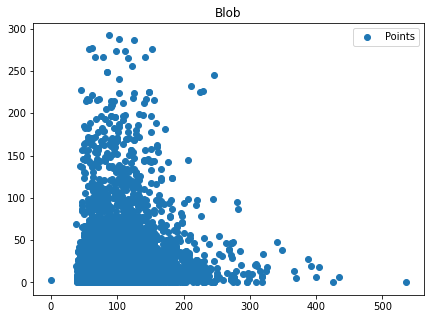

In [9]:

data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X = data.values

# The underline assumption in the clustering based anomaly detection is that if we cluster the data, normal data will belong to clusters while anomalies will not belong to any clusters or belong to small clusters. We use the following steps to find and visualize anomalies.
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('Blob')
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.legend(loc='best')


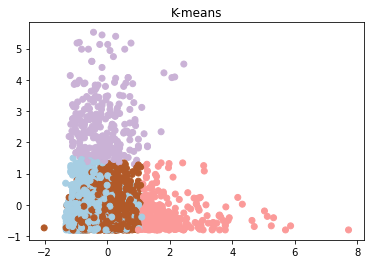

In [14]:

# we can't easily detect any anomolies from the plot above, so let's try another k-means experiment.

# KMEANS CLUSTERING
def kmeans(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    y_pred = km.predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("K-means")
    
kmeans(data, n_clusters=4) 


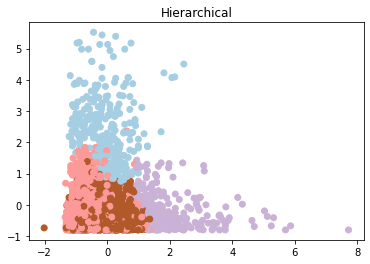

In [13]:

# HIERARCHIAL CLUSTERING
def hier(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    hier = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred = hier.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("Hierarchical")
    
hier(data, n_clusters=4)


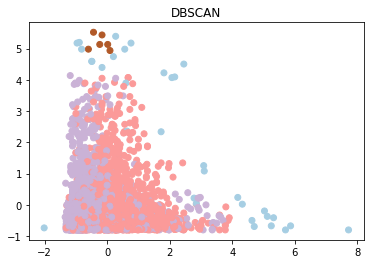

In [17]:

# Ah! DBSCAN appears to work well, wereas the former clustering algos really just pulled outlier data points into the groups they were most similarly associated with other data points.
# In this case, the DBSCAN algo determines that there are 6 outliers, which are colored brown.
# DBSCAN CLUSTERING   
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")
    
dbscan(data, eps=.5, min_samples=6)


In [18]:

# Isolation forest is an unsupervised learning algorithm for anomaly detection that works on the principle of isolating anomalies.
    
from sklearn.ensemble import IsolationForest

model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(df[['price_usd']])


df['scores']=model.decision_function(df[['price_usd']])
df['anomaly']=model.predict(df[['price_usd']])
df.head(20)


,date_time,price_usd,srch_booking_window,srch_saturday_night_bool,scores,anomaly
2041,2013-03-14 11:27:28,206.0,99,1,-0.023261,-1
3152,2013-01-03 20:48:24,186.0,6,0,0.012602,1
5166,2013-01-19 16:51:27,61.0,1,0,0.067769,1
10135,2013-01-26 11:34:23,72.0,116,0,0.059655,1
10560,2013-04-29 09:39:50,246.0,245,0,-0.114161,-1
11127,2013-03-25 19:43:44,52.0,7,0,0.025578,1
19171,2013-05-19 19:52:42,68.0,42,0,0.080569,1
25358,2012-11-14 17:18:51,46.0,4,0,0.000893,1
26107,2013-01-10 19:22:49,50.0,46,0,0.028474,1
27061,2013-03-27 14:49:27,122.0,100,1,0.077959,1


In [19]:

# Let's apply a filter to show ONLY the anomolies.
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)


                   date_time  price_usd  srch_booking_window  \
2041     2013-03-14 11:27:28      206.0                   99   
10560    2013-04-29 09:39:50      246.0                  245   
29088    2013-05-20 08:14:41      209.0                    5   
48834    2012-11-02 16:05:35       43.0                   17   
59199    2012-12-09 11:39:06       43.0                   24   
...                      ...        ...                  ...   
9775813  2013-04-07 12:21:17      236.0                    2   
9807434  2013-06-27 12:51:54      227.0                   78   
9879924  2013-03-11 14:41:35      230.0                    5   
9889844  2013-06-09 10:47:26      319.0                    6   
9900879  2013-06-08 10:13:17      309.0                    0   

         srch_saturday_night_bool    scores  anomaly  
2041                            1 -0.023261       -1  
10560                           0 -0.114161       -1  
29088                           1 -0.034022       -1  
48834      

In [ ]:

# Data:
# https://www.kaggle.com/c/expedia-personalized-sort/data?select=data.zip
